## Linear Discriminant Analysis with dataset watermelon 3$\alpha$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')

In [3]:
dataset = np.array(data)

In [4]:
X = dataset[:, :-1]
y = dataset[:, -1]

### $$S_{\omega}=\Sigma_0 + \Sigma_1= \sum\limits_{x\in X_0}(x-\mu_0)(x-\mu_0)^T+\sum\limits_{x\in X_1}(x-\mu_1)(x-\mu_1)^T$$ 

### $$\omega = S_{\omega}^{-1}(\mu_0-\mu_1)$$

In [71]:
def LDA_fun(X, y):
    
    X_0 = X[ y == 0 ]
    X_1 = X[ y == 1 ]
    
    ### calculate u0/1_mean
    u0 = X_0.mean(0, keepdims = True)
    u1 = X_1.mean(0, keepdims = True)
    
    ### calculate within-class scatter matrix and omega
    Sigma_0 = np.dot((X_0 - u0).T, (X_0 - u0))
    Sigma_1 = np.dot((X_1 - u1).T, (X_1 - u1))
    Sw = Sigma_0 + Sigma_1
    w = np.dot(np.linalg.inv(Sw), (u0 - u1).T).reshape(-1, 1)
    
    return Sigma_0, Sigma_1, Sw, w, u0, u1

In [72]:
Sig0, Sig1, Sw, w, u0, u1 = LDA_fun(X, y)

In [46]:
Sw

array([[0.42019039, 0.02176328],
       [0.02176328, 0.16425706]])

In [50]:
w[0]

array([-0.14650982])

In [83]:
px = np.array([0.1, 0.8])
py = (px*w[0] + w[1])

In [84]:
u0[0][1]

0.1542222222222222

In [91]:
Sw

array([[0.42019039, 0.02176328],
       [0.02176328, 0.16425706]])

In [92]:
ss = np.linalg.inv(Sw)

In [93]:
Sw.dot(ss)

array([[1., 0.],
       [0., 1.]])

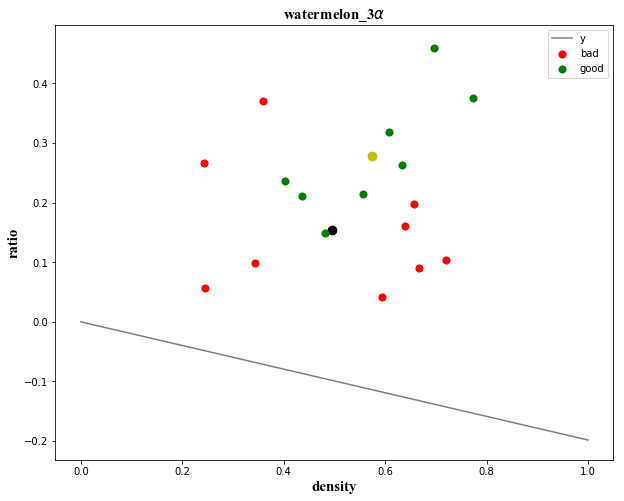

In [96]:
fgsize = 10,8
figure, fg = plt.subplots(figsize = fgsize)
font1 = {'family' : 'Times New Roman','weight' : 'normal','size'   : 15}
plt.title('watermelon_3' + r'$\alpha$', font1)
plt.xlabel('density', font1)
plt.ylabel('ratio', font1)
plt.plot([0, 1],[0, -w[0]/w[1]], c = 'gray', label = 'y')
plt.scatter(u0[0][0], u0[0][1], s = 75, c = 'k')
plt.scatter(u1[0][0], u1[0][1], s = 75, c = 'y')
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 50, c = 'r', label = 'bad')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 50, c = 'g', label = 'good')
plt.legend(loc = 'upper right')